In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
df=pd.read_csv("/content/mystery_data.csv",header=None)
df

,0,1,2,3,4
0,101,40,M,5.6,45
1,102,90,M,10.3,97
2,103,84,F,7.7,98
3,104,52,M,11.6,98
4,105,43,F,8.4,47
...,...,...,...,...,...
95,196,42,M,10.2,61
96,197,66,M,10.9,65
97,198,68,F,10.6,58
98,199,71,M,7.9,53


**PART A**

In [38]:
df.columns=['ID','Math','Gender','Study_hours','Science']

In [39]:
df
#as in the line wise there is id and score are usually discreet so i decided this column as math and gender is categorical and remaing is science column

,ID,Math,Gender,Study_hours,Science
0,101,40,M,5.6,45
1,102,90,M,10.3,97
2,103,84,F,7.7,98
3,104,52,M,11.6,98
4,105,43,F,8.4,47
...,...,...,...,...,...
95,196,42,M,10.2,61
96,197,66,M,10.9,65
97,198,68,F,10.6,58
98,199,71,M,7.9,53


**PART B**

In [40]:
df.isnull().sum()    # study hours has one null value

,0
ID,0
Math,0
Gender,0
Study_hours,1
Science,0


In [41]:
df=df.dropna(subset=['Study_hours'])    # dropna remove null value and subset means take one specific column which is subset
df.isnull().sum()            #  now the missing row is remove

,0
ID,0
Math,0
Gender,0
Study_hours,0
Science,0


In [42]:
df['Total_score']=df['Math']+df['Science']    # make new column in a dataset
df

/tmp/ipython-input-42-1947758054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_score']=df['Math']+df['Science']    # make new column in a dataset


,ID,Math,Gender,Study_hours,Science,Total_score
0,101,40,M,5.6,45,85
1,102,90,M,10.3,97,187
2,103,84,F,7.7,98,182
3,104,52,M,11.6,98,150
4,105,43,F,8.4,47,90
...,...,...,...,...,...,...
95,196,42,M,10.2,61,103
96,197,66,M,10.9,65,131
97,198,68,F,10.6,58,126
98,199,71,M,7.9,53,124


In [43]:
top_5_student=df['Total_score'].sort_values(ascending=False).head(5)
top_5_student      # print top five student

,Total_score
17,190
1,187
2,182
77,179
99,179


**PART C**

In [44]:
study_more_than_10 = df[df['Study_hours'] > 10] .count()
study_more_than_10      # sample size is about 42


,0
ID,42
Math,42
Gender,42
Study_hours,42
Science,42
Total_score,42


In [57]:
from statsmodels.stats import weightstats as st

study_more_than_10 = df[df['Study_hours'] > 10]   # Filter students who study more than 10 hours

# population mean which is expected
expected_mean = 70

# sample that i chceked is 42 which is greater 30 so i used z test

z_test, p_value = st.ztest(study_more_than_10['Math'], value=expected_mean)
alpha = 0.05    # significance level

# Conclusion
print(f"Z Test: {z_test}")
print(f"P value: {p_value}")

if p_value < alpha:
    print("Conclusion: Reject the null hypothesis.")
else:
    print("Conclusion: Accept the null hypothesis.")

Z Test: -1.0992432648833956
P value: 0.27166197191242414
Conclusion: Accept the null hypothesis.


In [46]:
total_score_0f_gender=df.groupby('Gender')['Total_score'].mean()
total_score_0f_gender         #based on gender total score so i used group by

,Total_score
Gender,
F,136.302326
M,140.089286


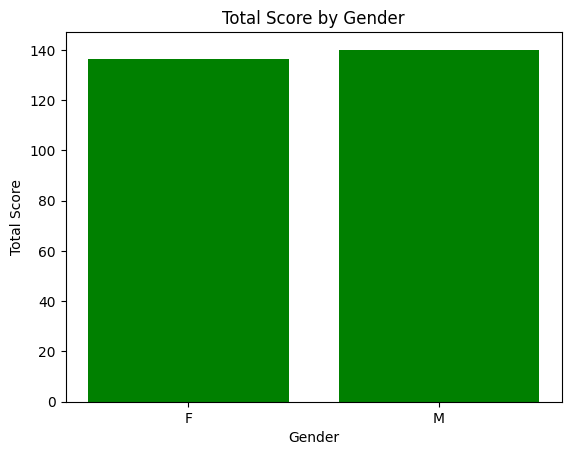

In [47]:

plt.bar(total_score_0f_gender.index,total_score_0f_gender.values,color='g')
plt.xlabel('Gender')
plt.ylabel('Total Score')
plt.title('Total Score by Gender')
plt.show()   # male and female both have almost same scoring there is minor differnece in the graph